In [ ]:
!pip3 install autoPyTorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 711 kB 5.2 MB/s 
     |████████████████████████████████| 202 kB 57.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 44.5 MB/s 
     |████████████████████████████████| 76.8 MB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 22.3 MB 114.6 MB/s 
     |████████████████████████████████| 4.9 MB 40.2 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
  Created wheel for smac: filename=smac-1.4.0-py3-none-any.whl size=262352 sha256=af7710ea8a27d04cf244afc077694e8c3281fa1303cd1b51aa32944faca56e7b
  Stored in directory: /root/.cache/pip/wheels/70/01/5

In [ ]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import time
import re
from autoPyTorch.api.tabular_classification import TabularClassificationTask

LOADING DATA

In [ ]:
TrainDataSet= pd.read_csv('../content/tweets.csv')
TrainDataSet.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


Data transformation

In [ ]:
df = TrainDataSet

df['tweetlength'] = df['text'].apply(lambda x:  len(str(x)))
df['text'] = df['text'].apply(lambda x: re.sub(r'#', '', str(x)))
df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))



In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 33.8 MB/s 
     |████████████████████████████████| 163 kB 29.1 MB/s 


In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import transformers
from transformers import RobertaTokenizer, TFRobertaModel
transformers.logging.set_verbosity_error()
import re
pd.set_option("display.max_columns", None)

In [ ]:
data0 = pd.read_csv('../content/tweets.csv')
display(data0[0:3].T)

,0,1,2
id,0,1,2
keyword,ablaze,ablaze,ablaze
location,NaN,NaN,New York City
text,"Communal violence in Bhainsa, Telangana. ""Ston...",Telangana: Section 144 has been imposed in Bha...,Arsonist sets cars ablaze at dealership https:...
target,1,1,1


In [ ]:
data=data0[['target','text']]
data=data.dropna()
data['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [ ]:
Name=['Not Real','Real']
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [ ]:
n=len(data)
N=list(range(n))
random.shuffle(N)

In [ ]:
len(N)

11370

In [ ]:
train_df = data.iloc[N].reset_index(drop=True)

In [ ]:
train_df

,target,text
0,0,You know you've struck a nerve when replies st...
1,0,"German news magazine rips Trump, calling him '..."
2,0,Shut up! 😂😂😂 Hell be on a stretcher. She'll be...
3,1,The freight train on the right has derailed at...
4,0,The wedding party all collapsed in the room So...
...,...,...
11365,0,Whole tape is flames
11366,0,"As an aside, it was the ""Franklin Expedition"" ..."
11367,0,"To the Brexitons who sneer, ""What happened to ..."
11368,0,always screaming and she thinks its cool to swear


In [ ]:
train_df["text"] = train_df["text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
max_len = 128

In [ ]:
def create_data(text):
    
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens = True,
        max_length= max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True)

    input_ids       = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {"input_ids": input_ids, "attention_masks": attention_masks}

In [ ]:
train_data = create_data(train_df['text'])

In [ ]:
texto = []
for i in range(len(train_data['input_ids'])):
  pretext = "";
  for z in range(128):
    pretext = pretext + str(train_data['input_ids'][i][z])
  texto.append(pretext)
  
    
print(texto)

['0118521647348232210103877721390386562267719112615842111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '0277093404320910741814061765123128879143071088128102485475232108120564090487673500282352654872677054542197521111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '04214762328178419264186369264186369264111412815102872352604264581288786391234457972123186361428521111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '01331459223411552353422620234251917942662981272341362615314431659438266371181174120564090487673288448932510428311729288211111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '0133331253770779311592940721421276985751542985170272111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '01262601927424471046841117505484711522331118659495028119

In [ ]:
disaster_tw = pd.DataFrame({
    'text':texto, 
    'target':df['target']
    })

In [ ]:
disaster_tw

,text,target
0,0118521647348232210103877721390386562267719112...,1
1,0277093404320910741814061765123128879143071088...,1
2,0421476232817841926418636926418636926411141281...,1
3,0133145922341155235342262023425191794266298127...,1
4,0133331253770779311592940721421276985751542985...,0
...,...,...
11365,0144474104789816849321111111111111111111111111...,0
11366,0162041436462421522160252614361421131905614631...,0
11367,0397252404179054180132546222264110275316973062...,0
11368,0300351134787942656330357249092111111111111111...,0


DATA CLEANING

In [ ]:
input_cols = disaster_tw.columns[:-1]
input_cols

Index(['text'], dtype='object')

In [ ]:
target_col =  disaster_tw.columns[-1]
target_col

'target'

In [ ]:
inputs_df = disaster_tw[list(input_cols)].copy()
inputs_df

,text
0,0118521647348232210103877721390386562267719112...
1,0277093404320910741814061765123128879143071088...
2,0421476232817841926418636926418636926411141281...
3,0133145922341155235342262023425191794266298127...
4,0133331253770779311592940721421276985751542985...
...,...
11365,0144474104789816849321111111111111111111111111...
11366,0162041436462421522160252614361421131905614631...
11367,0397252404179054180132546222264110275316973062...
11368,0300351134787942656330357249092111111111111111...


In [ ]:
targets = disaster_tw[(target_col)]
targets

0        1
1        1
2        1
3        1
4        0
        ..
11365    0
11366    0
11367    0
11368    0
11369    1
Name: target, Length: 11370, dtype: int64

AUTOML MODEL

In [ ]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#X_train = torch.from_numpy(X_train)
#X_test = torch.from_numpy(X_test)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
api = TabularClassificationTask()

In [ ]:
start = time.time()
history = api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    optimize_metric='accuracy',
    total_walltime_limit=100,
    func_eval_time_limit_secs=10
)
stop = time.time()
print(f"Training time: {stop - start}s")

[ERROR] [2022-10-26 22:27:35,383:Client-AutoPyTorch:60dbbeca-557d-11ed-804a-0242ac1c0002:1] Prediction for lgb failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/tae.py", line 61, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 512, in eval_train_function
    evaluator.fit_predict_and_loss()
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 189, in fit_predict_and_loss
    add_pipeline_to_self=True)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 364, in _fit_and_predict
    fit_and_suppress_warnings(self.logger, pipeline, X, y)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/abstract_evaluator.py", line 339, in fit_and_suppress_warnings


/usr/local/lib/python3.7/dist-packages/smac/intensification/parallel_scheduling.py:155: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  f"{self.__class__.__name__} is executed with {num_workers} workers only. "


[WARNING] [2022-10-26 22:27:51,371:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2022-10-26 22:27:57,854:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2022-10-26 22:28:04,529:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2022-10-26 22:28:05,749:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2022-10-26 22:28:06,966:Client-EnsembleBuilder] No models better than random - using Dummy Score!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2022-10-26 22:28:08,218:Client-EnsembleBuilder] No models better than rand

In [ ]:
predictions = api.predict(X_test)
print("Precision", sklearn.metrics.precision_score(y_test, predictions))
print("Recall", sklearn.metrics.recall_score(y_test, predictions))
print("Loss", sklearn.metrics.log_loss(y_test, predictions))
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Precision 0.0
Recall 0.0
Loss 6.272873637753825
Accuracy score 0.8183817062445031


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
score = api.score(y_test, predictions)
print(score)

{'accuracy': 0.8183817062445031}


Predecir nuevos resultados

In [ ]:
y_pred = api.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

Se han truncado las últimas 5000 líneas del flujo de salida.
---------------------------------- 
valor real:  1.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  1.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.0
valor estimado:  0.0
---------------------------------- 
valor real:  0.

Curva de precision

In [ ]:
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: 60dbbeca-557d-11ed-804a-0242ac1c0002
	Optimisation Metric: accuracy
	Best validation score: 0.8094603597601598
	Number of target algorithm runs: 16
	Number of successful target algorithm runs: 2
	Number of crashed target algorithm runs: 13
	Number of target algorithms that exceeded the time limit: 1
	Number of target algorithms that exceeded the memory limit: 0



[WARNING] [2022-10-26 22:30:27,729:matplotlib.font_manager] findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


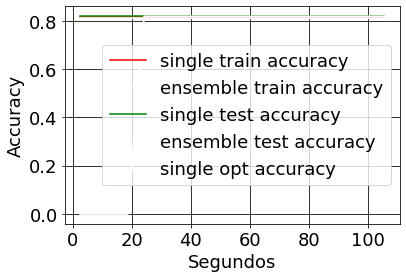

In [ ]:
from autoPyTorch.utils.results_visualizer import PlotSettingParams,ColorLabelSettings
metric_name = 'accuracy'

params = PlotSettingParams(
    #xscale='log',
    xlabel='Segundos',
    ylabel='Accuracy',
    #title='Toy Example',
    
    legend=True,
    figname= None,#'example_plot_over_time.png',
    #savefig_kwargs={'bbox_inches': 'tight'},
    show=True,  # If you would like to show, make it True and set figname=None,

)

api.plot_perf_over_time(
    metric_name=metric_name,
    plot_setting_params=params,
    #marker='*',
    #markersize=10,
    color_label_settings= ColorLabelSettings(single_train=('red', None), single_opt=('white', None), single_test=('green', None), ensemble_train=('white', None), ensemble_test=('white', None))
)
